In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df=df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


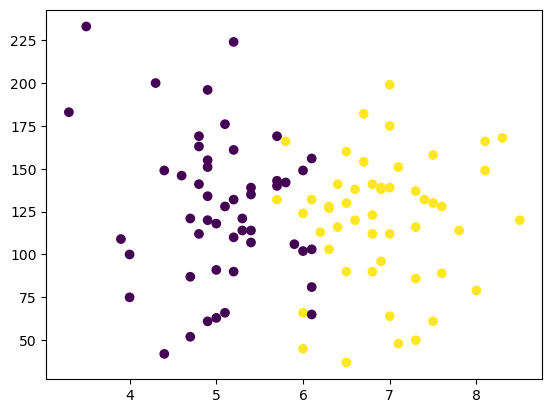

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [16]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

In [20]:
x.head()


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [21]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [25]:
x_train

,cgpa,iq
87,5.7,132.0
89,4.9,151.0
4,5.8,142.0
55,7.8,114.0
36,5.7,140.0
...,...,...
61,7.3,137.0
96,4.4,42.0
48,6.6,138.0
42,7.6,89.0


In [26]:
y_train

87    1
89    0
4     0
55    1
36    0
     ..
61    1
96    0
48    1
42    1
97    1
Name: placement, Length: 90, dtype: int64

In [37]:
#scaling the  data 
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [39]:
x_train=scaler.fit_transform(x_train)

In [40]:
x_train

array([[-0.22655282,  0.23703587],
       [-0.92363841,  0.70454606],
       [-0.13941712,  0.48309387],
       [ 1.60329687, -0.20586852],
       [-0.22655282,  0.43388227],
       [ 0.29626138,  0.13861267],
       [-0.83650271, -0.10744533],
       [ 1.42902547,  0.13861267],
       [-0.66223131, -0.79640771],
       [ 0.90621127, -1.43615851],
       [ 0.73193987,  0.01558367],
       [ 0.73193987, -0.79640771],
       [-0.74936701,  0.13861267],
       [ 0.03485428, -1.9036687 ],
       [ 0.38339708,  0.45848807],
       [-1.01077411,  0.45848807],
       [ 0.90621127, -0.25508012],
       [ 0.47053278,  0.92599826],
       [-0.66223131,  0.23703587],
       [-0.57509562, -0.20586852],
       [ 0.64480417,  0.77836346],
       [-0.05228142, -0.40271492],
       [-2.3178096 ,  1.49193165],
       [ 0.29626138, -0.47653232],
       [ 0.29626138,  0.11400687],
       [ 1.86470396,  0.65533446],
       [-0.83650271, -0.77180192],
       [ 1.16761837, -1.7806397 ],
       [ 0.12198998,

In [41]:
x_test=scaler.transform(x_test)

In [42]:
x_test

array([[ 0.47053278,  0.18782427],
       [ 0.12198998, -0.47653232],
       [ 0.47053278, -0.79640771],
       [ 0.81907557, -0.64877292],
       [ 1.34188977,  0.18782427],
       [-0.22655282,  1.14745046],
       [-1.01077411,  0.99981566],
       [-0.92363841,  0.80296926],
       [ 1.86470396,  1.07363306],
       [-0.22655282,  0.50769967]])

In [47]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf=LogisticRegression()

In [51]:
#model training
clf.fit(x_train,y_train)


LogisticRegression()

In [52]:
clf.predict(x_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [53]:
y_test

57    1
14    0
79    1
66    1
83    1
84    0
34    0
76    0
65    1
6     0
Name: placement, dtype: int64

In [55]:
y_pred=clf.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,y_pred)

0.9

In [63]:
#decision boundary

from mlxtend.plotting import plot_decision_regions

In [61]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 911.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
#decision boundary

from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

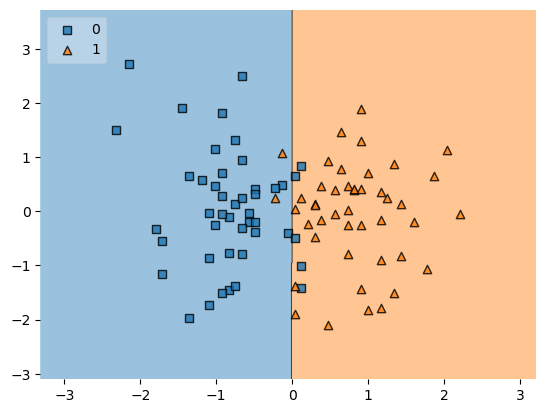

In [65]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [66]:
import pickle

In [67]:
pickle.dump(clf,open('model1.pkl','wb'))